In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.exceptions import AxisError
import pandas as pd
from scipy import stats
import pandas as pd

from sqlalchemy import create_engine, Table, Column, Integer, String, MetaData, Integer, String, insert, select

engine = create_engine("sqlite+pysqlite:///GPSdata1.db", echo=False)

metadata_obj = MetaData()

players_table = Table("players", metadata_obj, autoload_with=engine)
sessions_data_table = Table("sessions_data", metadata_obj, autoload_with=engine)

In [2]:
from figure_generators import generate_RPs_position_row, generate_RPs_row, generate_RPs_team_position_row

In [4]:
def get_measure_df(measure):

    measures = sessions_data_table.columns
    measure_column = measures[measure]

    with engine.connect() as conn:
        stmt = (
            select(players_table.c.team, players_table.c.position, measure_column)
            .join(sessions_data_table, players_table.c.id == sessions_data_table.c.player_id)
            .order_by(players_table.c.team)
        )

        data = conn.execute(stmt).mappings().all()

    return pd.DataFrame(data)

In [5]:
measures = ['HSR/min', 'Dis/min', 'SD/min', 'Accels + Decels /min', 'PlayerLoad']
# pallete = "dark"
pallete = ["#ccb21cff", "#43a8b6ff", "#15203d", "#3d4ccf"]

Ridge plots for each measure by position, using adjusted mean and stdv

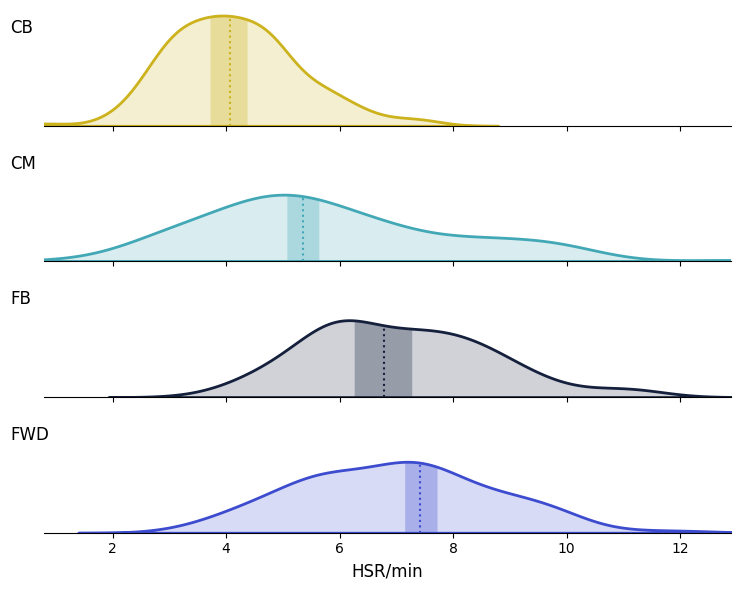

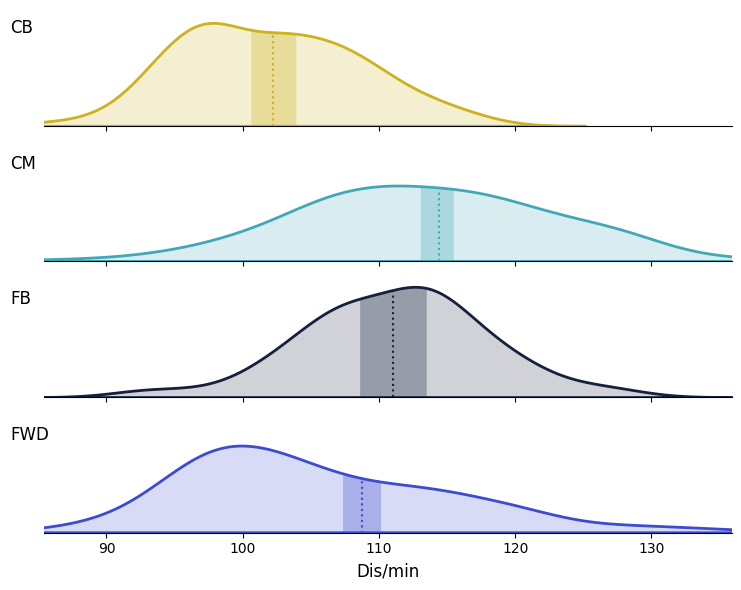

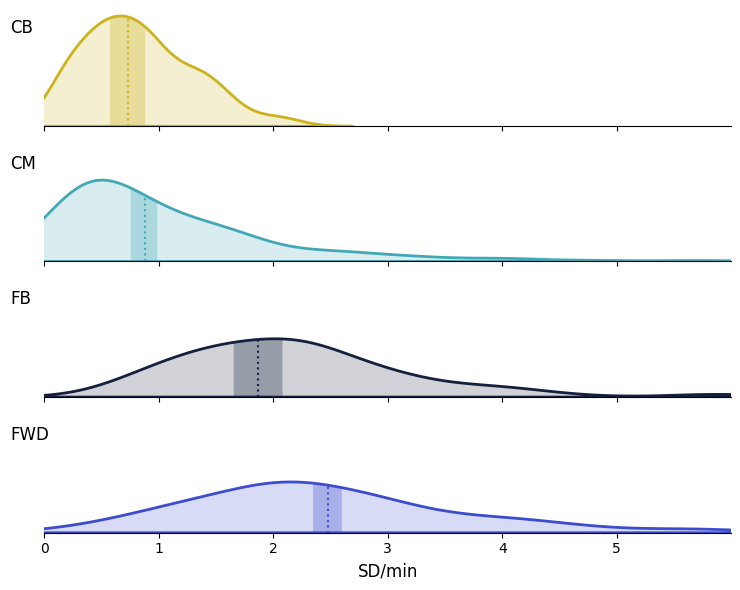

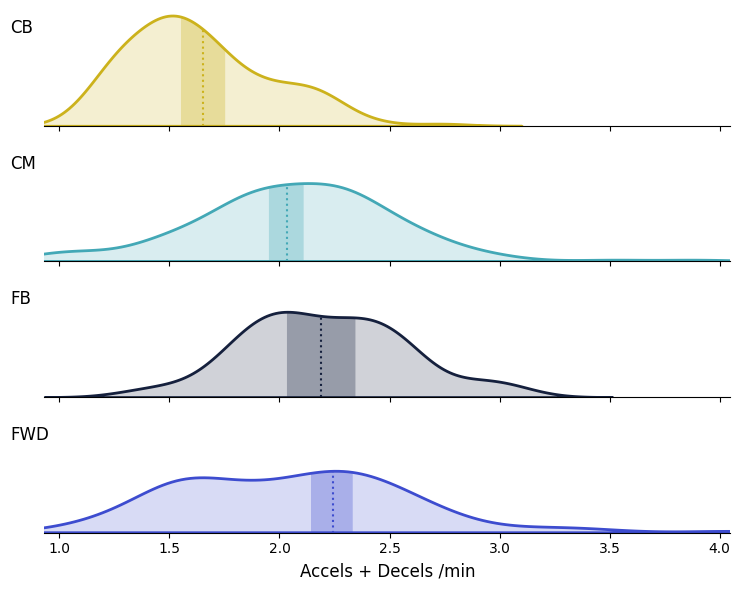

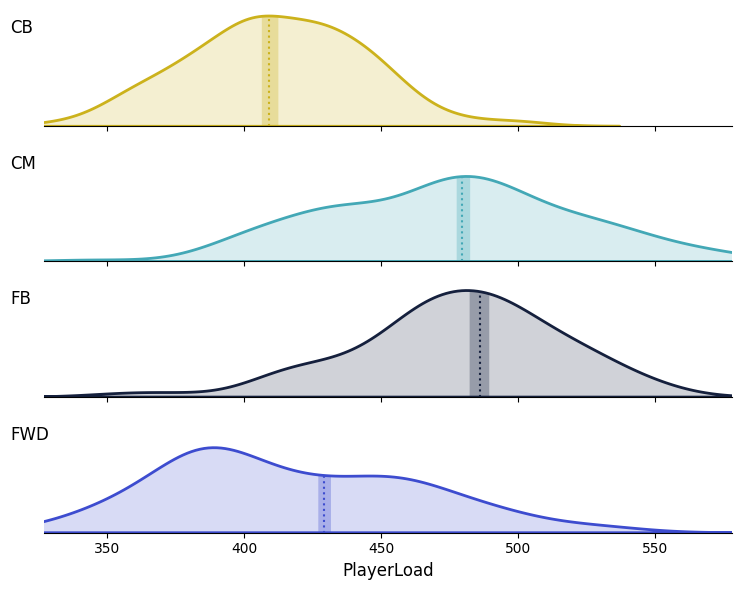

In [6]:
for measure in measures:
    df = get_measure_df(measure)
    generate_RPs_row(df=df, 
                          measure=measure, 
                          pallette=pallete, 
                          show_stdv=True, 
                          bw_adjust=1, 
                          height=1.5,
                          row="position",
                          mean_values=dict(adjusted_values_dict[measure]["position"][["Position", "Mean"]].values),
                          std_errs=dict(adjusted_values_dict[measure]["position"][["Position", "Std. Error"]].values)
                          )

Ridge plots for each measure by position, using adjusted mean and CI

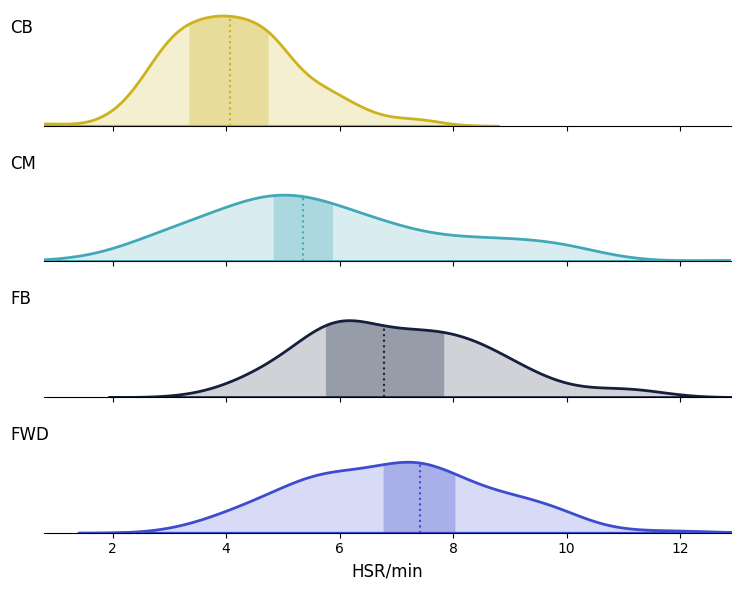

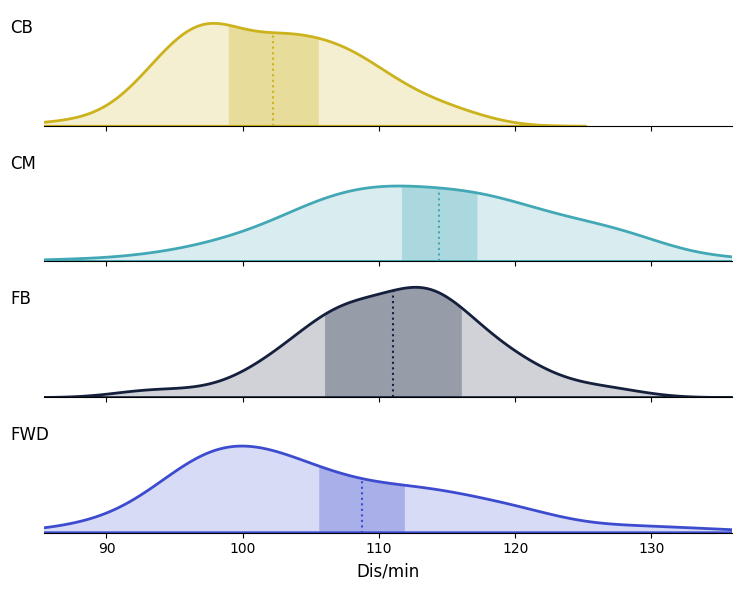

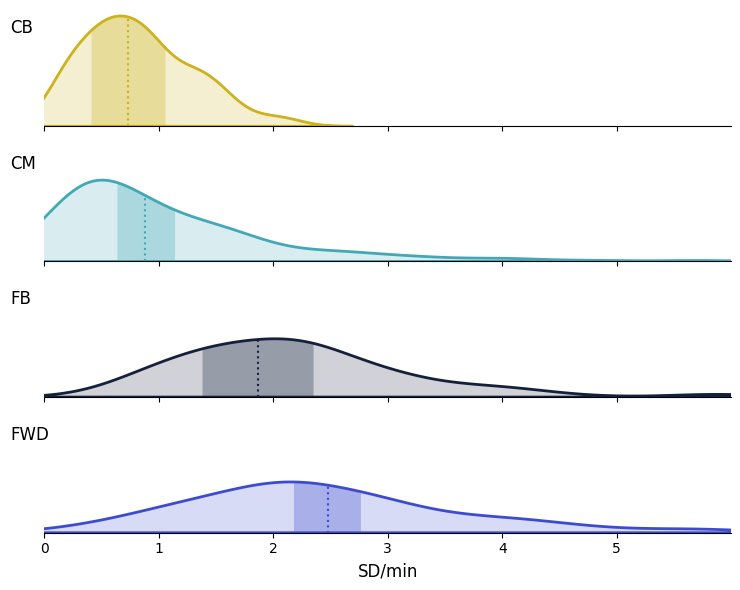

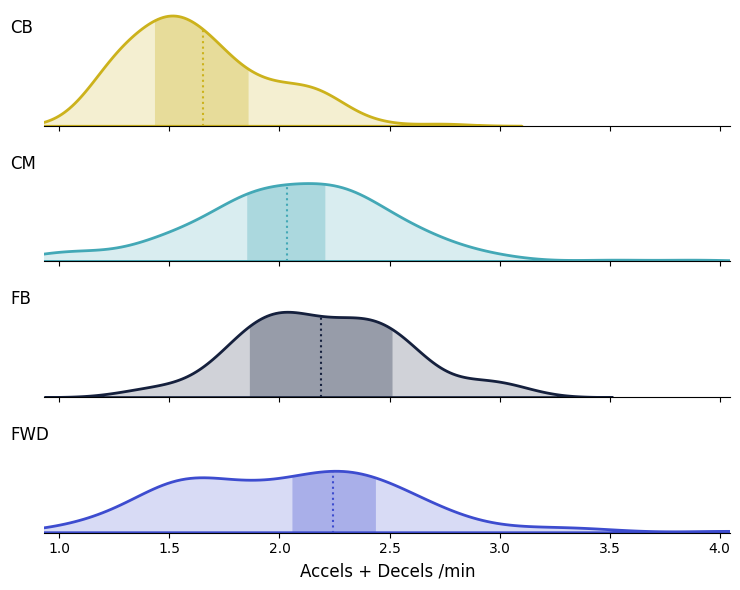

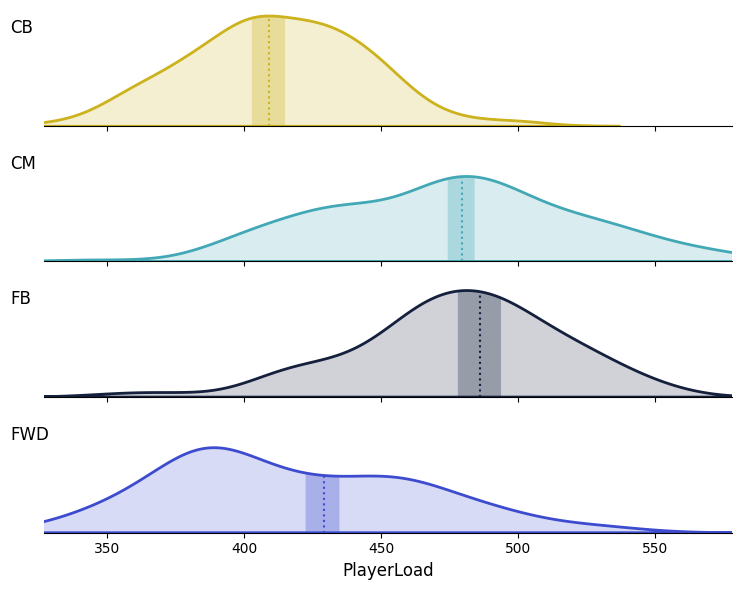

In [ ]:
for measure in measures:
    df = get_measure_df(measure)
    generate_RPs_row(df=df, 
                          measure=measure, 
                          pallette=pallete, 
                          show_stdv=True, 
                          bw_adjust=1, 
                          height=1.5,
                          row="position",
                          mean_values=dict(adjusted_values_dict[measure]["position"][["Position", "Mean"]].values),
                          ci_lowers=dict(adjusted_values_dict[measure]["position"][["Position", "95% CI Lower Bound"]].values),
                          ci_uppers=dict(adjusted_values_dict[measure]["position"][["Position", "95% CI Upper Bound"]].values)
                          )

Ridge plots for each measure by team, with means and stdv

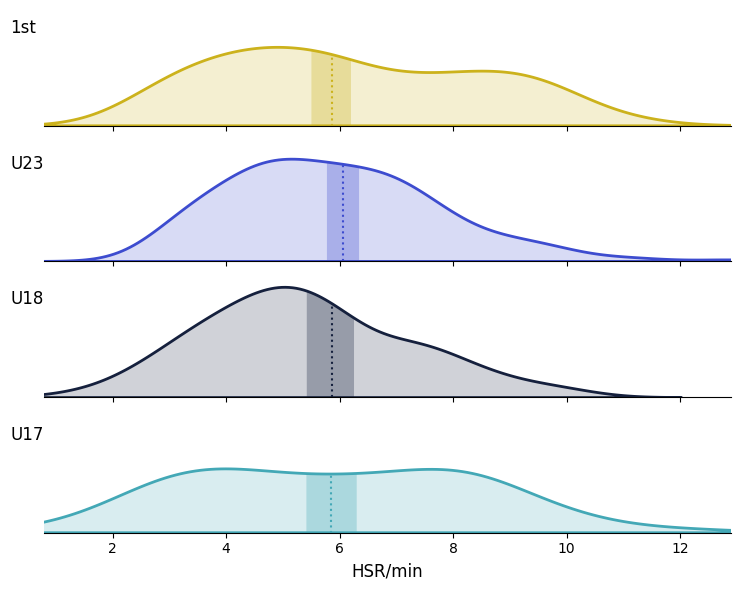

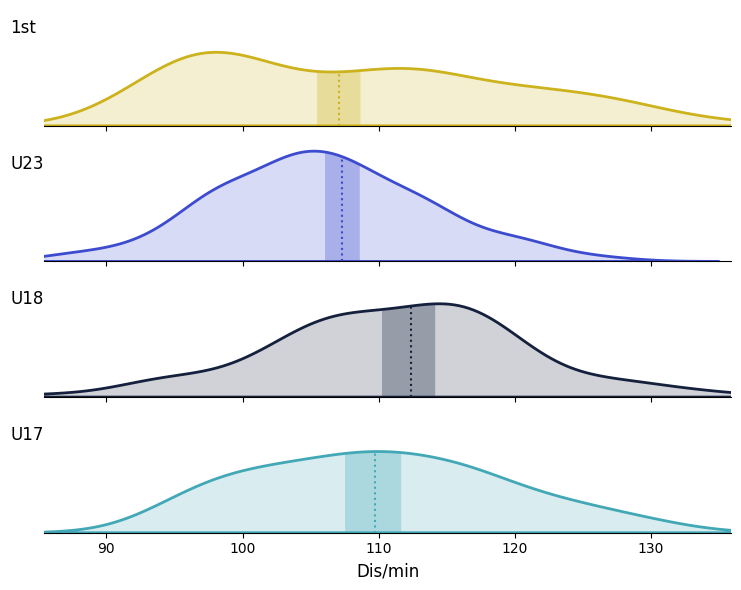

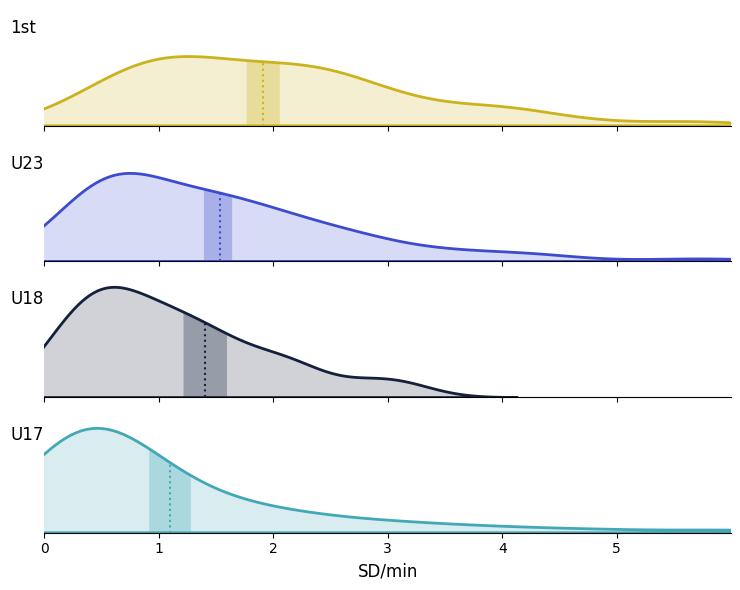

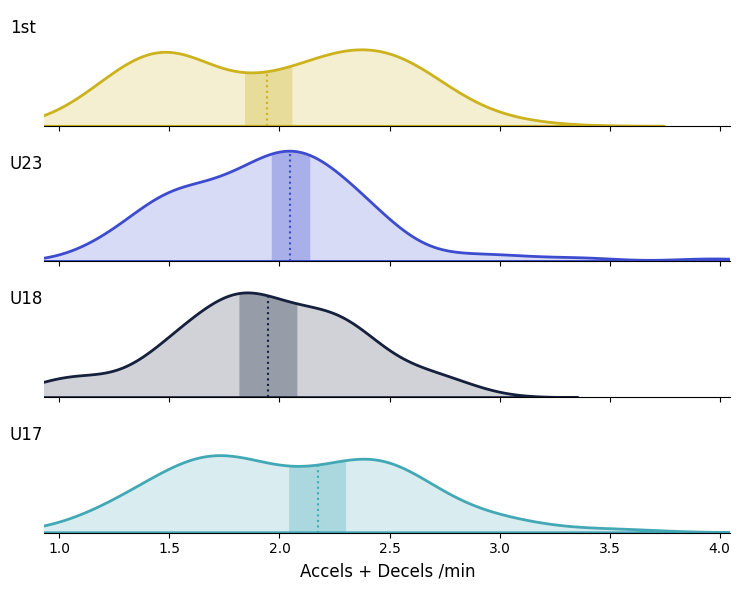

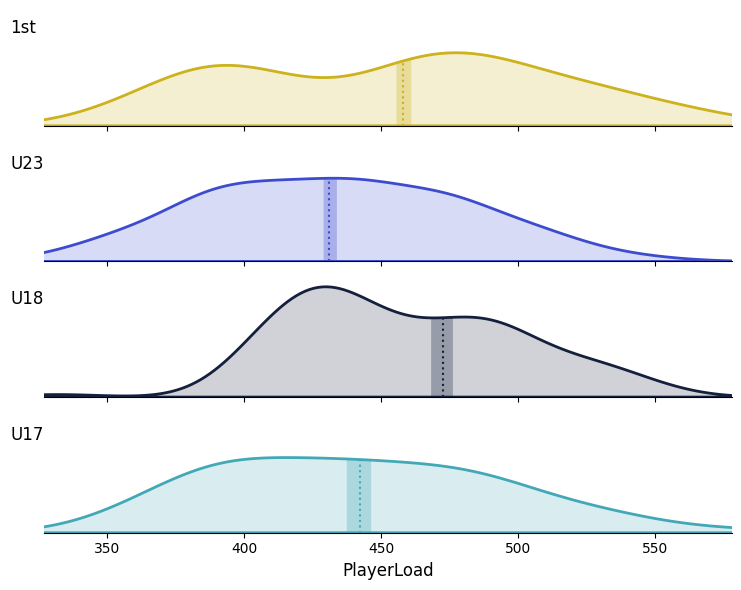

In [8]:
for measure in measures:
    df = get_measure_df(measure)
    generate_RPs_row(df=df, 
                          measure=measure, 
                          pallette=pallete, 
                          show_stdv=True, 
                          bw_adjust=1, 
                          height=1.5,
                          row="team",
                          mean_values=dict(adjusted_values_dict[measure]["team"][["Team", "Mean"]].values),
                          std_errs=dict(adjusted_values_dict[measure]["team"][["Team", "Std. Error"]].values)
                          )

Ridge plots for each measure by team, with means and CI

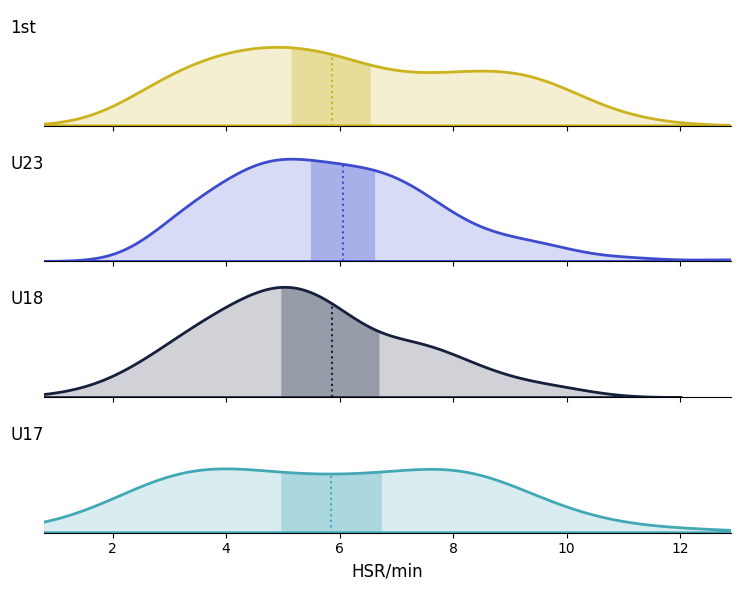

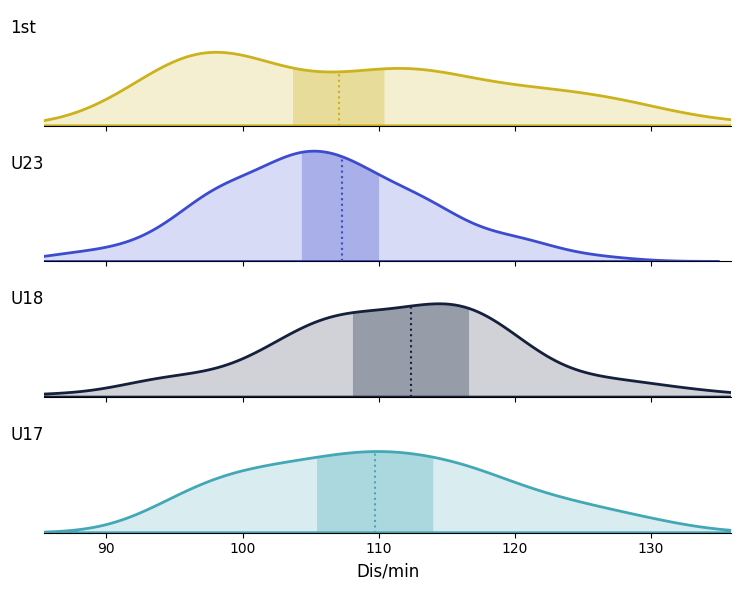

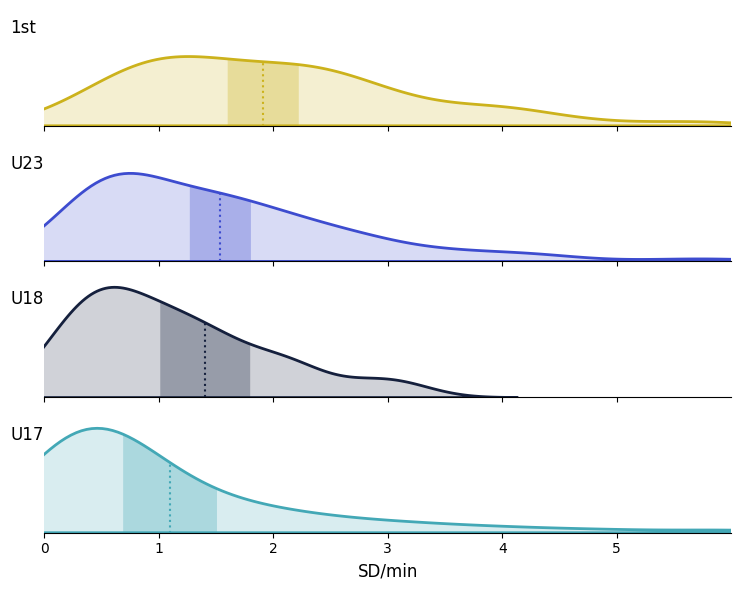

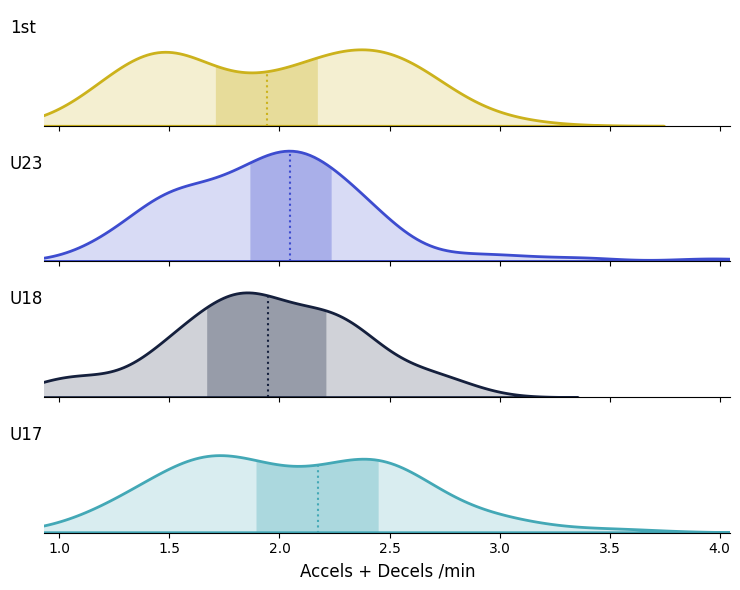

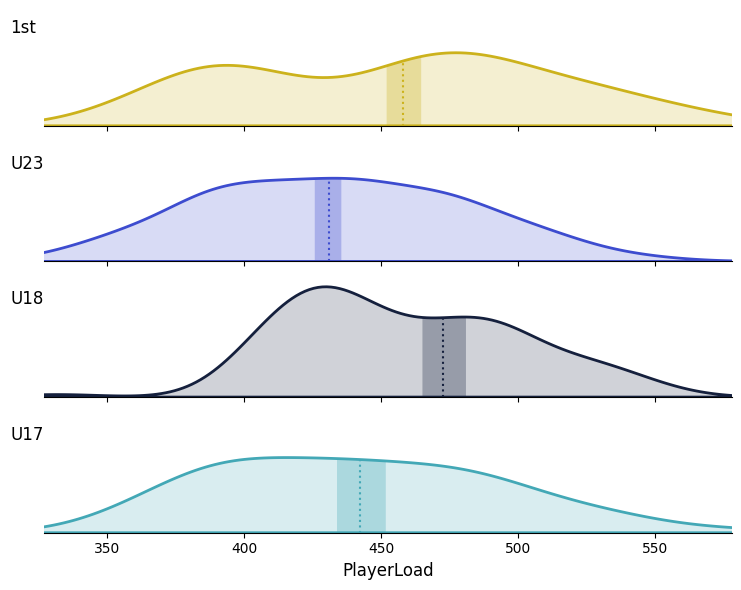

In [12]:
for measure in measures:
    df = get_measure_df(measure)
    generate_RPs_row(df=df, 
                          measure=measure, 
                          pallette=pallete, 
                          show_stdv=True, 
                          bw_adjust=1, 
                          height=1.5,
                          row="team",
                          mean_values=dict(adjusted_values_dict[measure]["team"][["Team", "Mean"]].values),
                          ci_lowers=dict(adjusted_values_dict[measure]["team"][["Team", "95% CI Lower Bound"]].values),
                          ci_uppers=dict(adjusted_values_dict[measure]["team"][["Team", "95% CI Upper Bound"]].values)
                          )

Ridgeline plots for team and position with adjusted means

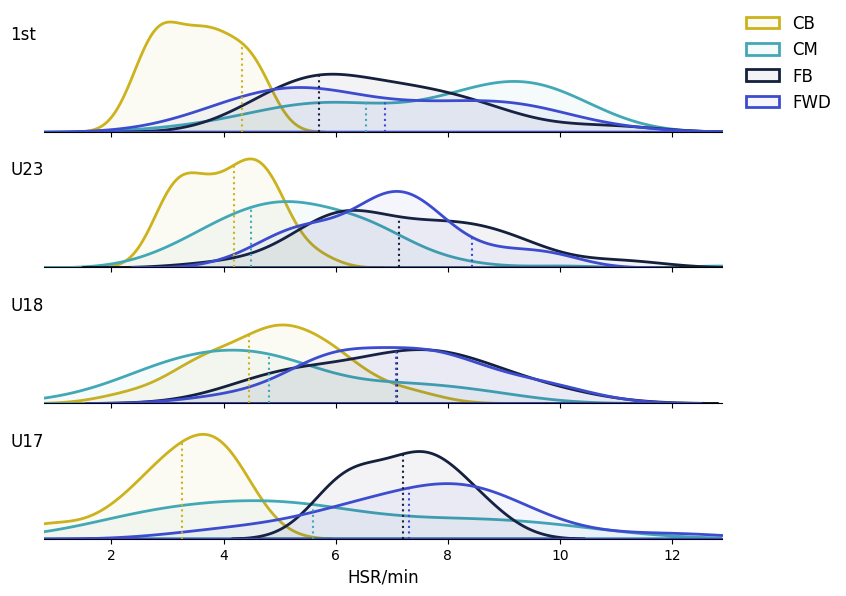

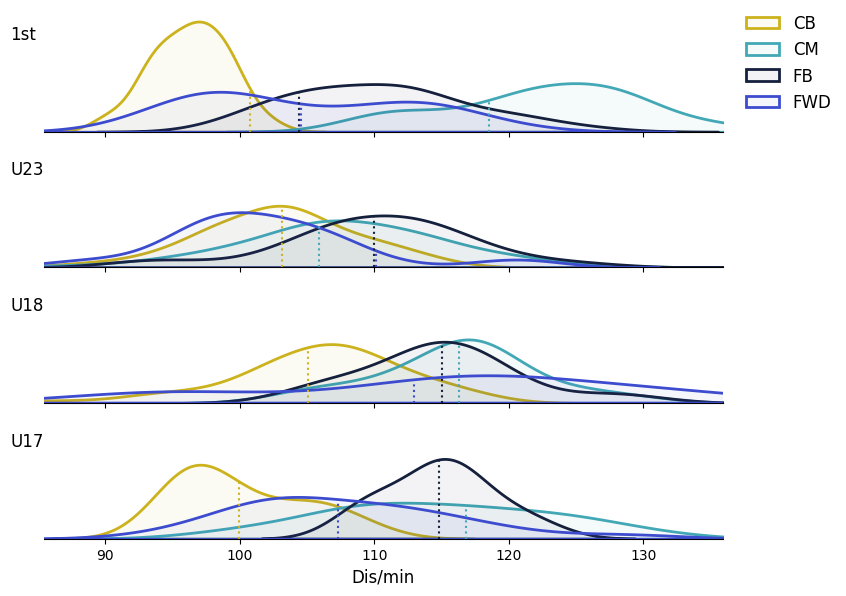

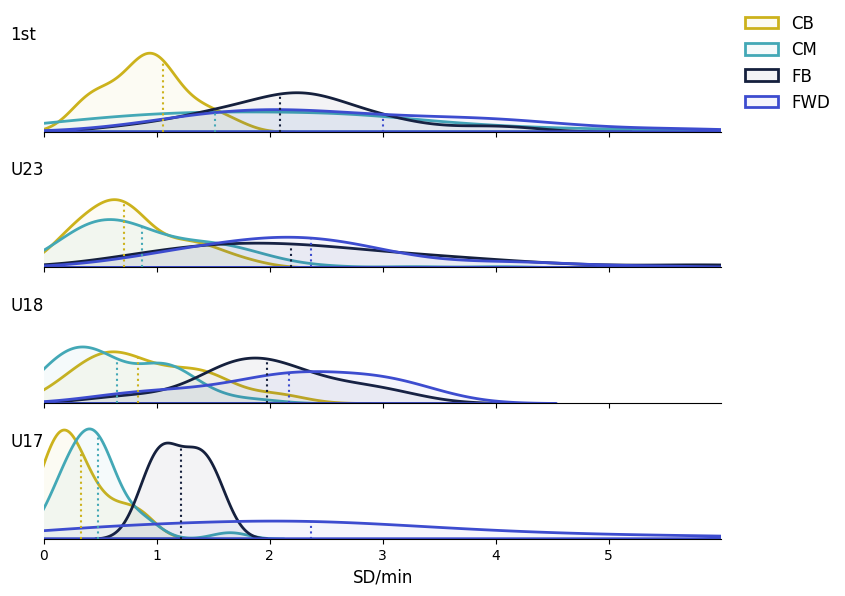

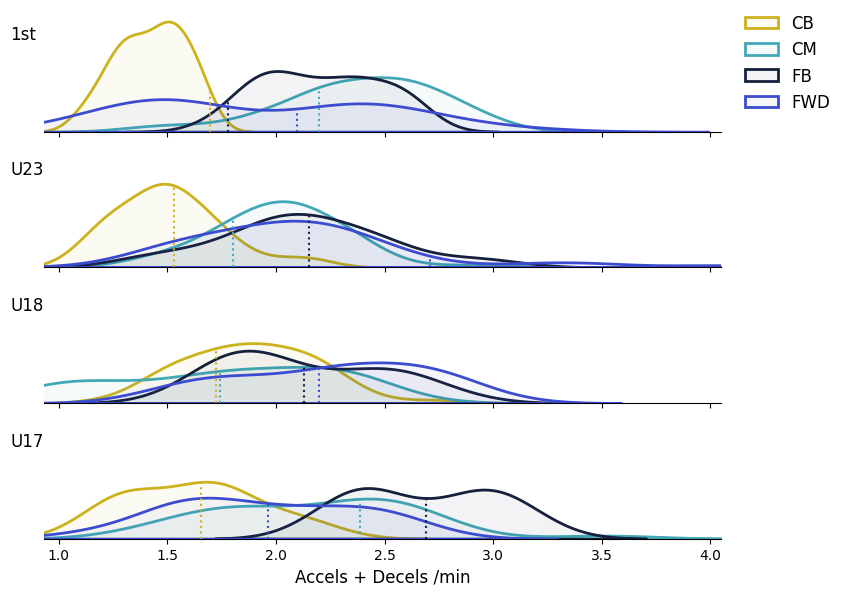

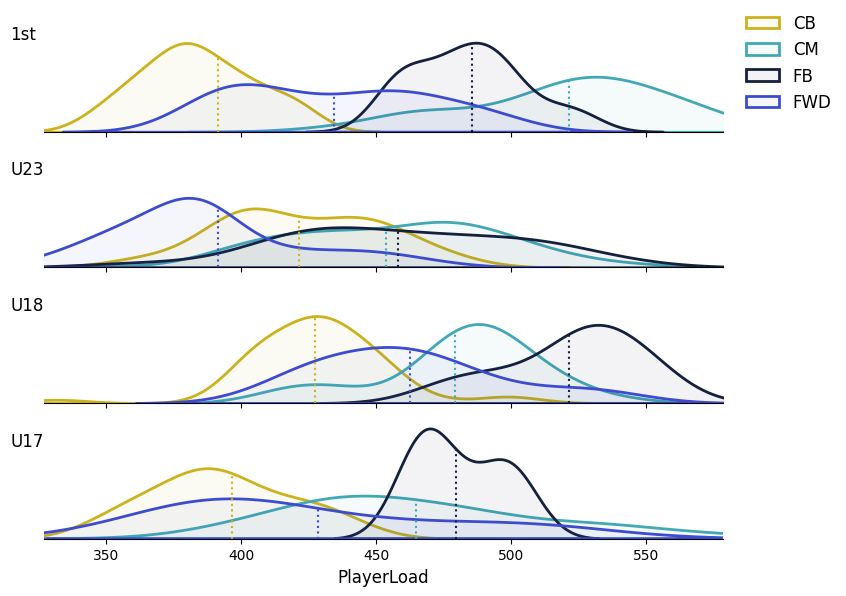

In [51]:
# Adjusted means

for measure in measures:
    df = get_measure_df(measure)
    generate_RPs_team_position_row(df=df, measure=measure, pallette=pallete, bw_adjust=1, height=1.5, mean_values=dict(adjusted_values_dict[measure]["team_position"]["Mean"]))